# Assignment 2, Spiking Neurons
- Parsa Torabian
- 20554368
- p2torabi

Populating the interactive namespace from numpy and matplotlib


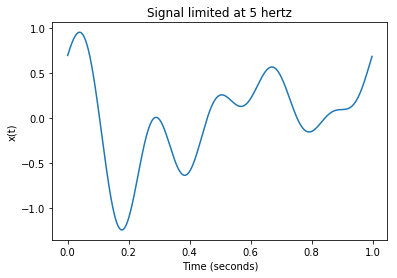

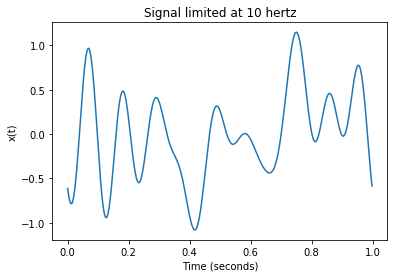

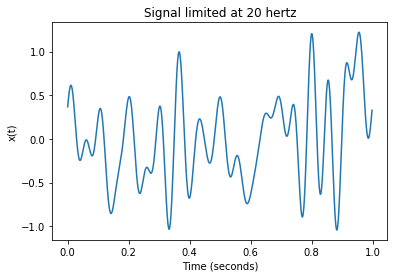

In [1]:
%pylab inline
from Utilities import *
from BaseNeuron import BaseNeuron
from LIF import LIF
import numpy as np

#Question 1.1a
dt = 0.001
def question11a(limit, gaussian=False):
    xt, xw = generate_signal(T=1, dt=dt, rms=0.5, limit=limit, gaussian=gaussian)
    x, y = xt
    figure()
    plot (x, y.real)
    title("Signal limited at "+ str(limit) + " hertz")
    ylabel("x(t)")
    xlabel("Time (seconds)")

question11a(5)
question11a(10)
question11a(20)


Text(0,0.5,'$Average |X(\\omega)|$')

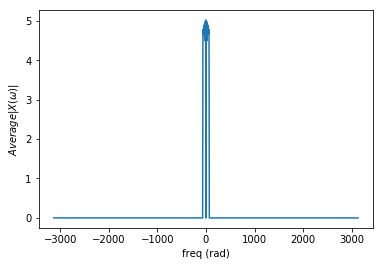

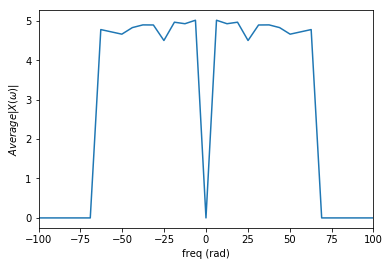

In [20]:
#Question 1.1b
counter = 0
N = 100
x = 0
for i in range(N):
    xt, xw = generate_signal(T=1, dt=0.001, rms=0.5, limit=10)
    x, y = xw
    counter += np.abs(y)
    
avg = counter/N

figure()
plot(x, avg)
xlabel('freq (rad)')
ylabel('$Average |X(\omega)|$')

figure()
plot(x, avg)
xlim(-100,100)
xlabel('freq (rad)')
ylabel('$Average |X(\omega)|$')

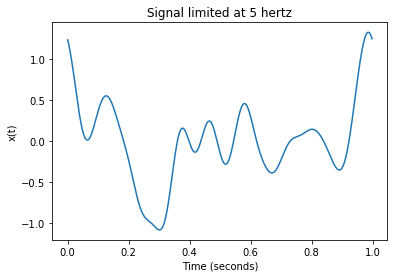

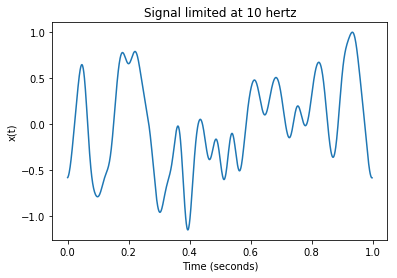

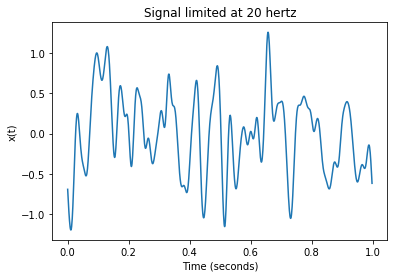

In [3]:
#Question 1.2a
question11a(5, True)
question11a(10, True)
question11a(20, True)

Text(0,0.5,'$Average |X(\\omega)|$')

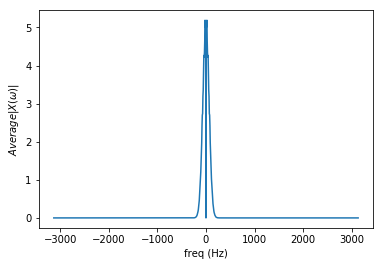

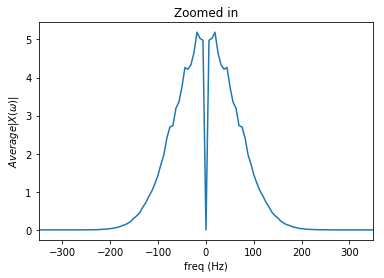

In [4]:
#Question 1.2b
counter = 0
N = 100
x = 0
for i in range(N):
    ((t, x), (w, X)) = generate_signal(T=1, dt=0.001, rms=0.5, limit=10, gaussian=True)
    counter += np.abs(X)
    
avg = counter/N

figure()
plot(w, avg)
xlabel('freq (Hz)')
ylabel('$Average |X(\omega)|$')

figure()
plot(w, avg)
xlim(-350, 350)
title("Zoomed in")
xlabel('freq (Hz)')
ylabel('$Average |X(\omega)|$')

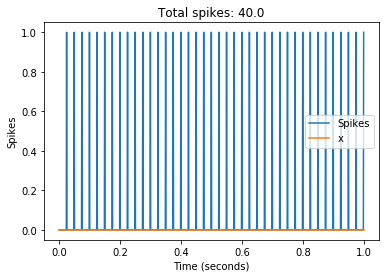

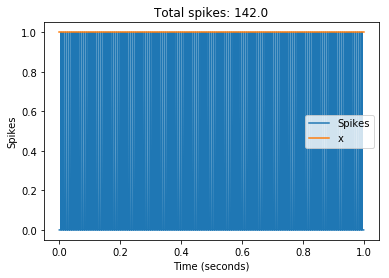

In [5]:
#Question 2a
neuron = LIF(0, 0, 1);
neuron.setParams(resting=40, stim=150)
dt = 0.001
n = int(np.ceil(1/dt))

def question2a(x):    
    spikes, voltages = neuron.voltageBuildup(x, dt)

    figure()
    xrange = np.arange(len(spikes))*dt
    xlabel("Time (seconds)")
    ylabel("Spikes")
    title("Total spikes: " + str(np.sum(spikes)))
    plot(xrange, spikes, label="Spikes")
    plot(xrange, x, label="x")
    legend()

question2a(np.zeros(n))
question2a(np.ones(n))


Question 2b: The number of spikes we see in the above two graphs roughly matches what we expect. When x is 0, we see 40 spikes, which is exactly what we expect. However, when x is one, we see it is slightly less than the expected 150. This might be due to the fact that the step (dt=0.001) is comparable to the tau_ref (0.002), the refractory period of the cell. This would mean that there is some information (or voltage) lost after a spike and when the voltage starts to buildup again. If we change the step to be something much smaller, say 0.0001 as we did below, then we get a value of 151, much closer to the expect 150. 

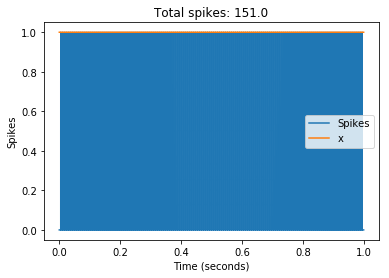

In [6]:
dt = 0.0001
n = int(np.ceil(1/dt))
question2a(np.ones(n))
dt = 0.001

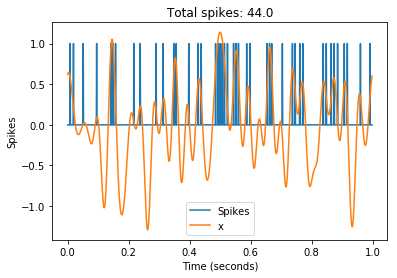

In [7]:
#Question 2c
xt, xw = generate_signal(T=1, dt=0.001, rms=0.5, limit=30)
x, y = xt
question2a(y.real)

(0, 0.2)

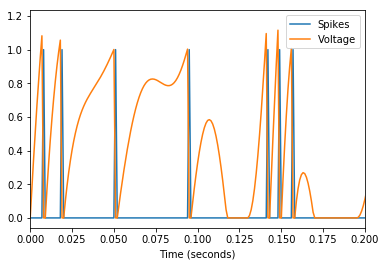

In [8]:
#Question 2d
spikes, voltage = neuron.voltageBuildup(y.real, dt)

xrange = np.arange(len(spikes))*dt
xlabel("Time (seconds)")
plot(xrange, spikes, label="Spikes")
plot(xrange, voltage, label="Voltage")
legend()
xlim(0, 0.2)

Question 2e (bonus): Not sure, but if the answer was to factor in tau_ref, I've already done that above

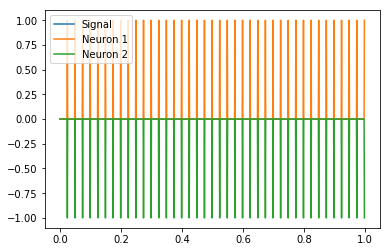

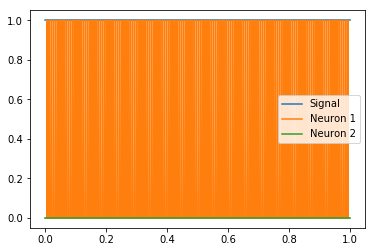

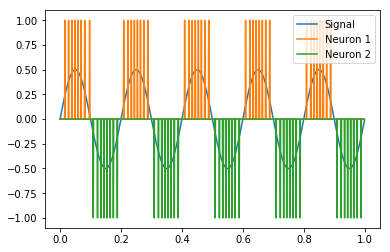

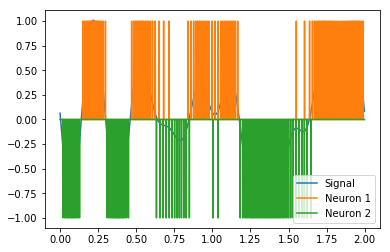

In [10]:
#Question 3
dt = 0.001
n = int(np.ceil(1/dt))
neuron2 = LIF(0, 0, -1);
neuron2.setParams(resting=40, stim=150)
def question3(x, T):
    spikes1, voltages1 = neuron.voltageBuildup(x, dt)
    spikes2, voltages2 = neuron2.voltageBuildup(x, dt)
    figure()
    xrange = np.arange(len(spikes1))*dt
    plot(xrange, x, label="Signal")
    plot(xrange, spikes1, label="Neuron 1")
    plot(xrange, spikes2*-1, label="Neuron 2")
    legend()
    return (spikes1, spikes2)

#Question 3a
question3(np.zeros(n), 1)
#Question 3b
question3(np.ones(n), 1)
#Question 3c
question3(0.5*np.sin(10*np.pi*np.arange(0, 1, dt)), 1)

#Question 3d
xt, xw = generate_signal(T=2, dt=0.001, rms=0.5, limit=5)
spikez = question3(xt[1].real, 2) #we need these spikes later, weird name to avoid collisions

Question 4 Below: Commented file in root directory of the repo

/Users/Parsa/courses/SYDE 556/custom library/BaseNeuron.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, float)
/Users/Parsa/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


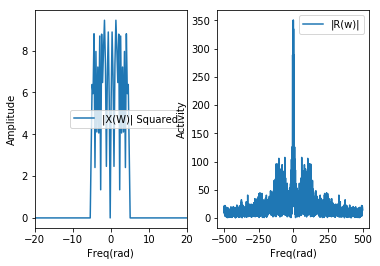

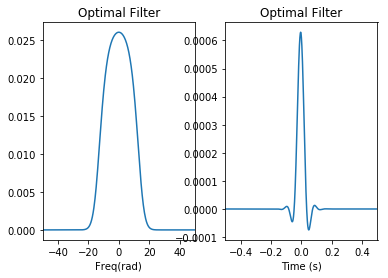

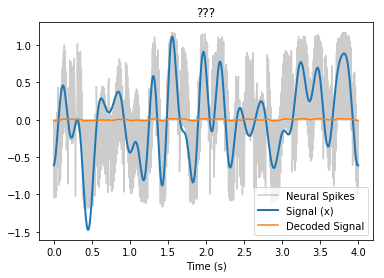

In [11]:
run optimal_filter.py 5 ""

/Users/Parsa/courses/SYDE 556/custom library/BaseNeuron.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, float)


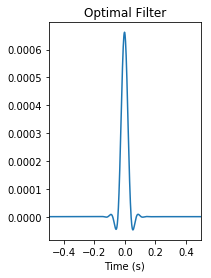

In [12]:
run optimal_filter.py 2 True

/Users/Parsa/courses/SYDE 556/custom library/BaseNeuron.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, float)


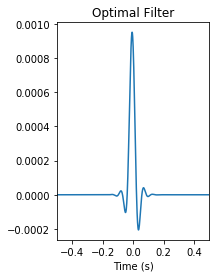

In [13]:
run optimal_filter.py 10 True

/Users/Parsa/courses/SYDE 556/custom library/BaseNeuron.py:35: ComplexWarning: Casting complex values to real discards the imaginary part
  x = np.array(x, float)


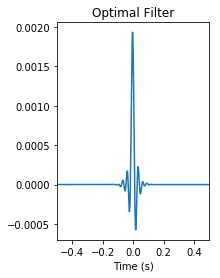

In [14]:
run optimal_filter.py 30 True

Question 4e: As we can see above, increasing the limit (or bandwidth) causes the optimal filter to become more narrow and taller. This makes sense as the input signal varies more rapidly, meaning that each individual spike has to contribute more to the signal being representing, albeit in a smaller temporal window.  

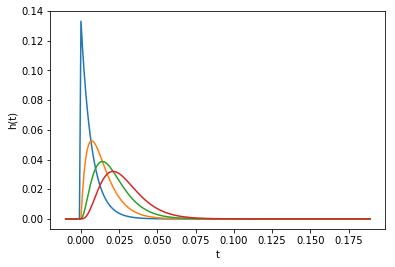

In [18]:
#Question 5a
def _filter(n, tau):
    t_h = np.arange(200)*dt-0.01
    h = np.power(t_h, n)*np.exp(-t_h/tau)
    h[np.where(t_h<0)]=0
    h = h/norm(h,1)
    return (t_h, h)
    
def question5(n, tau):
    t_h, h = _filter(n, tau)
    plot(t_h, h)
    xlabel('t')
    ylabel('h(t)');

question5(n=0, tau = 0.007)
question5(n=1, tau = 0.007)
question5(n=2, tau = 0.007)
question5(n=3, tau = 0.007)

In [ ]:
Increasing n will effect xhat by...

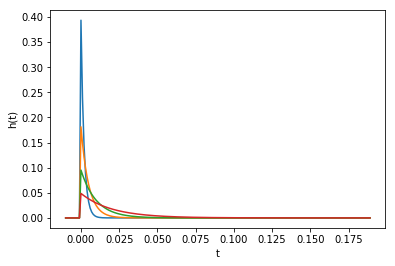

In [17]:
#Question 5b
question5(n=0, tau = 0.002)
question5(n=0, tau = 0.005)
question5(n=0, tau = 0.01)
question5(n=0, tau = 0.02)

In [ ]:
Increasing tau will effect xhat by...

[ 0.          0.16939109]


/Users/Parsa/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


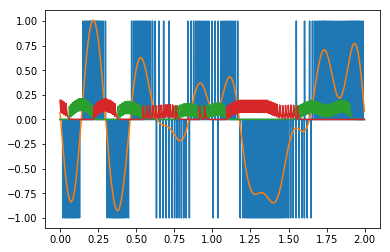

In [19]:
#Question 5c
t_h, h = _filter(n=0, tau=0.007)
u, x = xt
r = spikez[0] - spikez[1]

fspikes1 = np.convolve(spikez[0], h, mode='same')
fspikes2 = np.convolve(spikez[1], h, mode='same')
A = np.array([fspikes1, fspikes2]).T

# A = np.convolve(r, h, "same")
plot(u, r)
plot(u, x)
print( A[1, :] )
d = BaseNeuron.decode(A, x)
xhat = np.dot(A, d)
plot(u, A)


In [ ]:
#Question 5d